In [1]:
from pathlib import Path
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
results_dir = Path("results")

rows = list()

for p in results_dir.glob('*.pt'):
    series = torch.load(p)
    
    for r in series:
        rows.append({
            'name': p.stem.replace('_', ' '),
            'loss': float(r['final_loss']),
            'size': r['size'],
            'size_series': r.get('size_series', None)
        })
        
df = pd.DataFrame(rows)
df = df.sort_values(by='name')

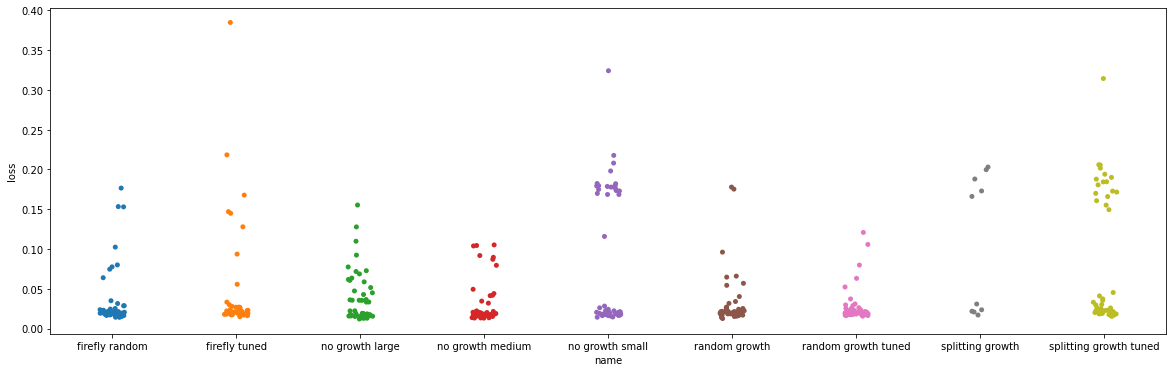

In [3]:
fig, ax = plt.subplots(figsize=(20, 6))
hue = None

if df['loss'].max() > 0.5:

    cutoff = 0.5

    failed = df['loss'].isnull() | (df['loss'] > cutoff)

    df['failed'] = failed
    df.loc[failed, 'loss'] = cutoff
    
    plt.ylim(0, 0.5+0.01)
    hue = "failed"
    
sns.stripplot(x="name", y="loss", hue=hue, data=df, ax=ax)

plt.show()

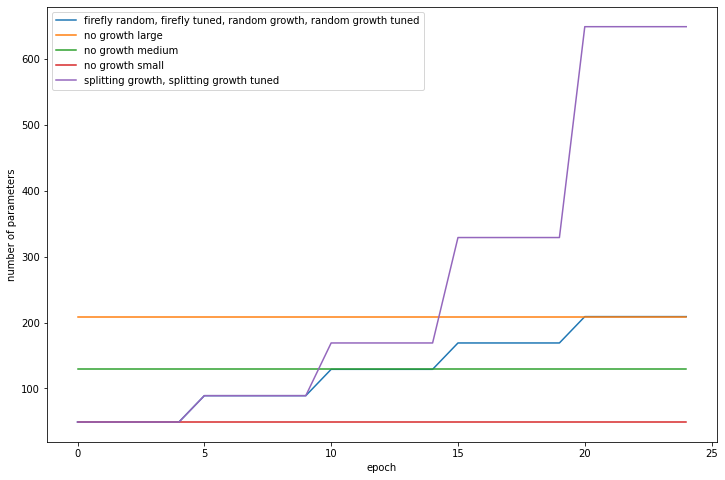

In [4]:
d = dict()

plt.subplots(figsize=(12, 8))

for name in df['name'].unique():
    example = (df['name'] == name).argmax()
    
    s = tuple(df.iloc[example]['size_series'])
    
    if s not in d:
        d[s] = []
    
    d[s].append(name)
    
for k, v in d.items():
    plt.plot(list(k), label=', '.join(v))

plt.xlabel('epoch')
plt.ylabel('number of parameters')
plt.legend()
plt.show()

In [5]:
rows = list()

for name in df['name'].unique():
    l = df[(df['name'] == name)]['loss'].mean()
    rows.append({'name':name, 'mean loss': l})
    
df_mean = pd.DataFrame(rows)
df_mean = df_mean.sort_values(by='mean loss')
df_mean

,name,mean loss
6,random growth tuned,0.027360
3,no growth medium,0.030936
5,random growth,0.031714
0,firefly random,0.034637
2,no growth large,0.038064
1,firefly tuned,0.044515
8,splitting growth tuned,0.079856
4,no growth small,0.085629
7,splitting growth,0.104409
